# Implementação do método da secante 

Neste capítulo, utilizamos uma implementação própria do método da secante para resolver equações não-lineares unidimensionais. O algoritmo é capaz de lidar com uma quantidade razoável de funções matemáticas.

Para ser executado, o método `secante` requer 5 parâmetros: 

- estimativas iniciais `xa` e `xb`;
- a função $f(x)$ propriamente dita, representada por `f`;
- o erro relativo desejado $ER$, representado por `tol`;
- o número máximo de iterações $N$ para tentativa de solução, representado por `N`.

In [2]:
import inspect, re
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable as pt

def secante(xa,xb,f,tol,N):
    """Algoritmo para determinação de raízes pelo método da secante.

    Parâmetros: 
        f: string dependendo de uma variável, i.e., a função-alvo
            (e.g., 'x**2 - 1', 'x**2*cos(x)', etc.) 
        xa: 1a. estimativa 
        xb: 2a. estimativa        
        tol: erro relativo desejado (tolerância)
        N: número máximo de iterações a repetir

    Retorno: 
        x: aproximação para a raiz da função
    """

    # construtor de tabela
    table = pt()
    
    # substitui expressões da string pelas chamadas das funções do numpy
    f = re.sub('(sin|sinh|cos|cosh|tan|tanh|exp|log|sqrt|log10|arcsin|arccos|arctan|arcsinh|arccosh|arctanh)', r'np.\1', f)    
    
    # identifica a variável independente em f
    var = re.search(r'([a-zA-Z][\w]*) ?([\+\-\/*]|$|\))', f).group(1)
    
    # cria função
    f = eval('lambda ' + var + ' :' + f)
    
    # checa se a função é de uma variável, senão lança erro        
    try: 
        len(inspect.getfullargspec(f).args) - 1 > 0
    except:
        raise ValueError('O código é válido apenas para uma variável.')
    
    it = 0 # contador de iteracoes
    
    # cabeçalho de tabela
    table.field_names = ['i','x','f(x)','ER']

    # imprime estimativa inicial
    print(f'Estimativas iniciais: xa = {xa:.6f}; xb = {xb:.6f}\n')  

    # Loop 
    for i in range(0,N):
        
        x = (xa*f(xb) - xb*f(xa))/(f(xb) - f(xa))
        
        e = abs(x-xb)/abs(x) # erro
        
        # tabela
        # impressão de tabela
        table.add_row([i,np.round(x,8),np.round(f(x),8),f'{e:e}'])
        table.align = 'c';      
        
        if e < tol:
            break
        xa = xb
        xb = x                
        
    print(table)
       
    if i == N:
        print(f'Solução não obtida em {N:d} iterações')
    else:
        print(f'Solução obtida: x = {x:.6f}')

    return x

## Problema

Determinar a raiz positiva da equação: $f(x) = \sqrt{x} - 2e^{-2x}$, pelo método das secantes com erro inferior a $10^{-5}$. 

### Resolução

Para obter os valores iniciais $x_0$ e $x_1$ necessários ao processo iterativo do método das secantes, fazemos a análise gráfica.

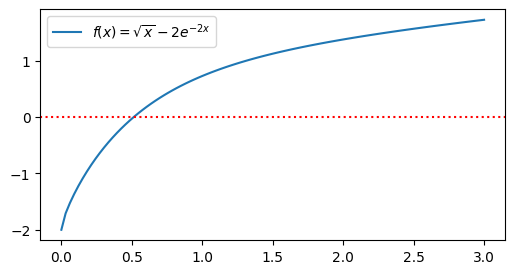

In [27]:
def f(x):
    return np.sqrt(x) - 2*np.exp(-2*x) 
  
x = np.linspace(0,3,100)
plt.figure(figsize=(6,3))
plt.plot(x,f(x),label='$f(x) = \\sqrt{x} - 2e^{-2x}$');
plt.axhline(y=0,color='r',linestyle=':')
plt.legend();

Verificamos que a raiz encontra-se próxima a $0.5$

In [28]:
f(0.5)

-0.028652101156337095

Assim, podemos escolher duas estimativas iniciais próximas deste valor, digamos $x_0 = 0.5 - \delta x$ e $x_1 = 0.5 + \delta x$, com $\delta x = 10^{-1}$.

In [4]:
x0, dx = 0.5, 1e-1
x = secante(x0 - dx,x0 + dx,'sqrt(x) - 2*exp(-2*x)',1e-5,100)

Estimativas iniciais: xa = 0.400000; xb = 0.600000

+---+------------+-------------+--------------+
| i |     x      |     f(x)    |      ER      |
+---+------------+-------------+--------------+
| 0 | 0.52143975 |  0.01723111 | 1.506603e-01 |
| 1 | 0.51270504 | -0.00126447 | 1.703652e-02 |
| 2 | 0.5133022  |   8.57e-06  | 1.163365e-03 |
| 3 | 0.51329818 |     0.0     | 7.829741e-06 |
+---+------------+-------------+--------------+
Solução obtida: x = 0.513298


## Exemplo

Resolva o problema $f(x) = 0$, para $f(x) = -\text{arccos}(x) + 4\text{sen}(x) + 1.7$, no intervalo $-0.2 \le x \le 1.0$ e $\epsilon = 10^{-3}$.

In [10]:
x0, dx = -0.8, 1e-1
x = secante(x0 - dx,x0 + dx,'-arccos(x) + 4*sin(x) + 1.7',1e-3,20)

Estimativas iniciais: xa = -0.900000; xb = -0.700000

+---+-------------+-------------+--------------+
| i |      x      |     f(x)    |      ER      |
+---+-------------+-------------+--------------+
| 0 |  0.01559341 |  0.20716881 | 4.589077e+01 |
| 1 | -0.02762483 | -0.00890993 | 1.564471e+00 |
| 2 | -0.02584274 |   -1.4e-06  | 6.895899e-02 |
| 3 | -0.02584246 |     0.0     | 1.082134e-05 |
+---+-------------+-------------+--------------+
Solução obtida: x = -0.025842


Resolvemos usando outras estimativas iniciais.

In [39]:
x0, dx = -0.9, 1e-3
x = secantes(x0 - dx,x0 + dx,'-arccos(x) + 4*sin(x) + 1.7',1e-3,20)

Estimativas iniciais: xa = -0.901000; xb = -0.899000

+---+-------------+-------------+--------------+
| i |      x      |     f(x)    |      ER      |
+---+-------------+-------------+--------------+
| 0 | -0.03737686 | -0.05765454 | 2.305231e+01 |
| 1 | -0.02514562 |  0.00348352 | 4.864164e-01 |
| 2 | -0.02584253 |   -3.5e-07  | 2.696761e-02 |
| 3 | -0.02584246 |     -0.0    | 2.747395e-06 |
+---+-------------+-------------+--------------+
Solução obtida: x = -0.025842
